In [1]:
import pandas as pd
import numpy as np
import phate
import scprep

# matplotlib settings for Jupyter notebooks only
%matplotlib inline


In [2]:
pbmc = pd.read_pickle('/data/jianhao/clus_GRN/magic_expression_data/magic_smoothed_all_genes_500_cells_per_cluster')
# pbmc.head()

In [3]:
pbmc.head()

,ENSG00000243485,ENSG00000237613,ENSG00000186092,ENSG00000238009,ENSG00000239945,ENSG00000237683,ENSG00000239906,ENSG00000241599,ENSG00000228463,ENSG00000237094,...,ENSG00000217792,ENSG00000268276,ENSG00000148828,ENSG00000215700,ENSG00000215699,ENSG00000215635,ENSG00000268590,ENSG00000251180,ENSG00000215616,label
0,-1.225807e-14,-2.790371e-15,-2.063242e-15,3.658569e-17,3.045811e-15,-0.002478,1.457896e-15,1.722247e-15,0.001138,-2.261266e-16,...,0.0,0.0,0.0,0.011655,0.018841,0.0,0.0,0.0,0.0,cd19_b_cells
1,-1.153311e-14,1.672123e-15,-3.636978e-15,1.266469e-16,2.545249e-15,0.001124,5.451795e-15,2.513353e-15,0.001299,-2.216267e-16,...,0.0,0.0,0.0,0.019169,0.023746,0.0,0.0,0.0,0.0,cd19_b_cells
2,-4.527740e-15,-3.117860e-14,1.190059e-14,2.379781e-15,3.821409e-15,0.022105,-5.886740e-15,-2.672445e-15,0.004001,1.592646e-15,...,0.0,0.0,0.0,0.031811,0.037513,0.0,0.0,0.0,0.0,cd19_b_cells
3,-1.093903e-14,4.612600e-16,-3.044669e-15,1.315908e-16,3.292075e-15,0.000808,5.152480e-15,2.541908e-15,0.001172,-2.536081e-16,...,0.0,0.0,0.0,0.018910,0.023776,0.0,0.0,0.0,0.0,cd19_b_cells
4,-9.927800e-15,2.156502e-15,-4.580283e-15,-6.312515e-16,7.409462e-16,0.004060,6.044567e-15,2.037060e-15,0.001567,-3.738246e-16,...,0.0,0.0,0.0,0.025351,0.026432,0.0,0.0,0.0,0.0,cd19_b_cells


In [6]:
EBT_counts = pbmc.drop(columns = 'label')
sample_labels = pbmc['label']

In [7]:
EBT_counts.head()

,ENSG00000243485,ENSG00000237613,ENSG00000186092,ENSG00000238009,ENSG00000239945,ENSG00000237683,ENSG00000239906,ENSG00000241599,ENSG00000228463,ENSG00000237094,...,ENSG00000215764,ENSG00000217792,ENSG00000268276,ENSG00000148828,ENSG00000215700,ENSG00000215699,ENSG00000215635,ENSG00000268590,ENSG00000251180,ENSG00000215616
0,-1.225807e-14,-2.790371e-15,-2.063242e-15,3.658569e-17,3.045811e-15,-0.002478,1.457896e-15,1.722247e-15,0.001138,-2.261266e-16,...,0.0,0.0,0.0,0.0,0.011655,0.018841,0.0,0.0,0.0,0.0
1,-1.153311e-14,1.672123e-15,-3.636978e-15,1.266469e-16,2.545249e-15,0.001124,5.451795e-15,2.513353e-15,0.001299,-2.216267e-16,...,0.0,0.0,0.0,0.0,0.019169,0.023746,0.0,0.0,0.0,0.0
2,-4.527740e-15,-3.117860e-14,1.190059e-14,2.379781e-15,3.821409e-15,0.022105,-5.886740e-15,-2.672445e-15,0.004001,1.592646e-15,...,0.0,0.0,0.0,0.0,0.031811,0.037513,0.0,0.0,0.0,0.0
3,-1.093903e-14,4.612600e-16,-3.044669e-15,1.315908e-16,3.292075e-15,0.000808,5.152480e-15,2.541908e-15,0.001172,-2.536081e-16,...,0.0,0.0,0.0,0.0,0.018910,0.023776,0.0,0.0,0.0,0.0
4,-9.927800e-15,2.156502e-15,-4.580283e-15,-6.312515e-16,7.409462e-16,0.004060,6.044567e-15,2.037060e-15,0.001567,-3.738246e-16,...,0.0,0.0,0.0,0.0,0.025351,0.026432,0.0,0.0,0.0,0.0


In [ ]:
sample_labels = sample_labels.values

In [8]:
EBT_counts, sample_labels = scprep.filter.library_size_filter(EBT_counts, sample_labels, cutoff=2000)

AttributeError: module 'scprep.filter' has no attribute 'library_size_filter'

In [9]:
EBT_counts = scprep.filter.filter_rare_genes(EBT_counts, min_cells=10)

In [10]:
EBT_counts = scprep.normalize.library_size_normalize(EBT_counts)

In [12]:
EBT_counts.head()

,ENSG00000243485,ENSG00000237613,ENSG00000186092,ENSG00000238009,ENSG00000239945,ENSG00000237683,ENSG00000239906,ENSG00000241599,ENSG00000228463,ENSG00000237094,...,ENSG00000198786,ENSG00000198695,ENSG00000198727,ENSG00000215750,ENSG00000215781,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215700,ENSG00000215699
0,-1.211086e-13,-2.756861e-14,-2.038464e-14,3.614632e-16,3.009233e-14,-0.024479,1.440388e-14,1.701564e-14,0.011245,-2.234109e-15,...,5.128435,0.136060,19.171160,0.008389,-0.000240,0.035125,0.013576,0.015758,0.115148,0.186150
1,-9.700622e-14,1.406440e-14,-3.059100e-14,1.065240e-15,2.140835e-14,0.009451,4.585561e-14,2.114007e-14,0.010922,-1.864125e-15,...,5.296527,0.118845,18.684699,0.015873,0.000495,0.041124,0.010136,0.016677,0.161232,0.199731
2,-1.755185e-14,-1.208643e-13,4.613282e-14,9.225256e-15,1.481375e-14,0.085692,-2.282004e-14,-1.035977e-14,0.015511,6.173917e-15,...,5.503148,0.023529,18.719736,0.008995,-0.001633,0.043328,0.005583,0.006051,0.123317,0.145418
3,-9.367662e-14,3.950011e-15,-2.607310e-14,1.126881e-15,2.819176e-14,0.006923,4.412339e-14,2.176769e-14,0.010041,-2.171779e-15,...,5.322425,0.123739,18.888932,0.013964,0.000600,0.038350,0.010103,0.016906,0.161936,0.203603
4,-7.508540e-14,1.630994e-14,-3.464135e-14,-4.774247e-15,5.603884e-15,0.030709,4.571594e-14,1.540658e-14,0.011851,-2.827290e-15,...,5.425138,0.101316,18.826487,0.018827,-0.000493,0.044293,0.008548,0.016926,0.191730,0.199908


In [13]:
EBT_counts = scprep.transform.sqrt(EBT_counts)

ValueError: Cannot square root transform negative values

In [14]:
phate_operator = phate.PHATE(n_jobs=-2)

Y_phate = phate_operator.fit_transform(EBT_counts)

Calculating PHATE...
  Running PHATE on 1500 cells and 13783 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.15 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.14 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 1.36 seconds.
  Calculating optimal t...
    Automatically selected t = 22
  Calculated optimal t in 0.60 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.17 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 40.87 seconds.
Calculated PHATE in 43.07 seconds.


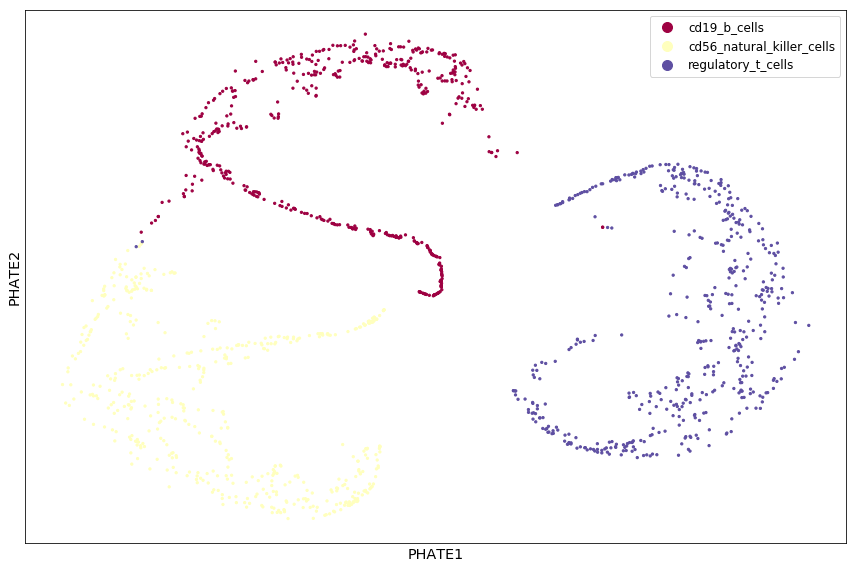

In [15]:
scprep.plot.scatter2d(Y_phate, c=sample_labels, figsize=(12,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE")